In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )
import datetime
import math
#from pandas_datareader import data, wb
import io
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18
import plotly.express as px

In [3]:

import yfinance as yf

# Initializing the Ticker object
rel_ticker = yf.Ticker('RELIANCE.NS')

# Extracting the history
df = rel_ticker.history(start='2015-01-01')

In [4]:
df.head()

Open        High         Low       Close  \
Date                                                                        
2015-01-01 00:00:00+05:30  415.767049  418.440946  414.523920  416.517609   
2015-01-02 00:00:00+05:30  416.611441  420.340827  414.828833  415.415222   
2015-01-05 00:00:00+05:30  415.157235  417.924924  410.043990  410.864929   
2015-01-06 00:00:00+05:30  408.120643  409.527971  390.294680  392.218018   
2015-01-07 00:00:00+05:30  392.687075  402.866654  392.640165  400.755676   

                            Volume  Dividends  Stock Splits  
Date                                                         
2015-01-01 00:00:00+05:30  1367720        0.0           0.0  
2015-01-02 00:00:00+05:30  3383424        0.0           0.0  
2015-01-05 00:00:00+05:30  4662967        0.0           0.0  
2015-01-06 00:00:00+05:30  8596809        0.0           0.0  
2015-01-07 00:00:00+05:30  9562421        0.0           0.0

In [6]:
df.tail()

Open         High          Low        Close  \
Date                                                                            
2023-11-01 00:00:00+05:30  2289.149902  2317.500000  2275.199951  2297.399902   
2023-11-02 00:00:00+05:30  2313.949951  2324.300049  2307.949951  2320.199951   
2023-11-03 00:00:00+05:30  2327.199951  2334.949951  2315.750000  2319.699951   
2023-11-06 00:00:00+05:30  2332.300049  2340.000000  2325.600098  2339.000000   
2023-11-07 00:00:00+05:30  2334.050049  2339.100098  2319.550049  2323.800049   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-11-01 00:00:00+05:30  5154595        0.0           0.0  
2023-11-02 00:00:00+05:30  5281052        0.0           0.0  
2023-11-03 00:00:00+05:30  4425078        0.0           0.0  
2023-11-06 00:00:00+05:30  5323652        0.0           0.0  
2023-11-07 00:00:00+05:30  3478854        0.0           0.0

In [5]:
df.shape

(2186, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2186 entries, 2015-01-01 00:00:00+05:30 to 2023-11-07 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2186 non-null   float64
 1   High          2186 non-null   float64
 2   Low           2186 non-null   float64
 3   Close         2186 non-null   float64
 4   Volume        2186 non-null   int64  
 5   Dividends     2186 non-null   float64
 6   Stock Splits  2186 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 136.6 KB


In [8]:
df.describe()

Open         High          Low        Close        Volume  \
count  2186.000000  2186.000000  2186.000000  2186.000000  2.186000e+03   
mean   1405.532279  1420.498942  1389.607986  1404.429179  8.838722e+06   
std     791.270400   798.706288   782.979590   790.526657  6.490496e+06   
min     383.070419   383.586429   373.617960   380.326172  0.000000e+00   
25%     618.746933   627.341593   613.322672   618.495178  5.121108e+06   
50%    1236.881709  1247.986322  1217.637155  1234.644287  6.983904e+06   
75%    2237.900442  2260.795646  2204.908297  2230.130676  1.003404e+07   
max    2837.553094  2845.946774  2787.154456  2831.846680  6.584835e+07   

         Dividends  Stock Splits  
count  2186.000000   2186.000000  
mean      0.026754      0.000915  
std       0.423960      0.042776  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       9.000000      2.000000

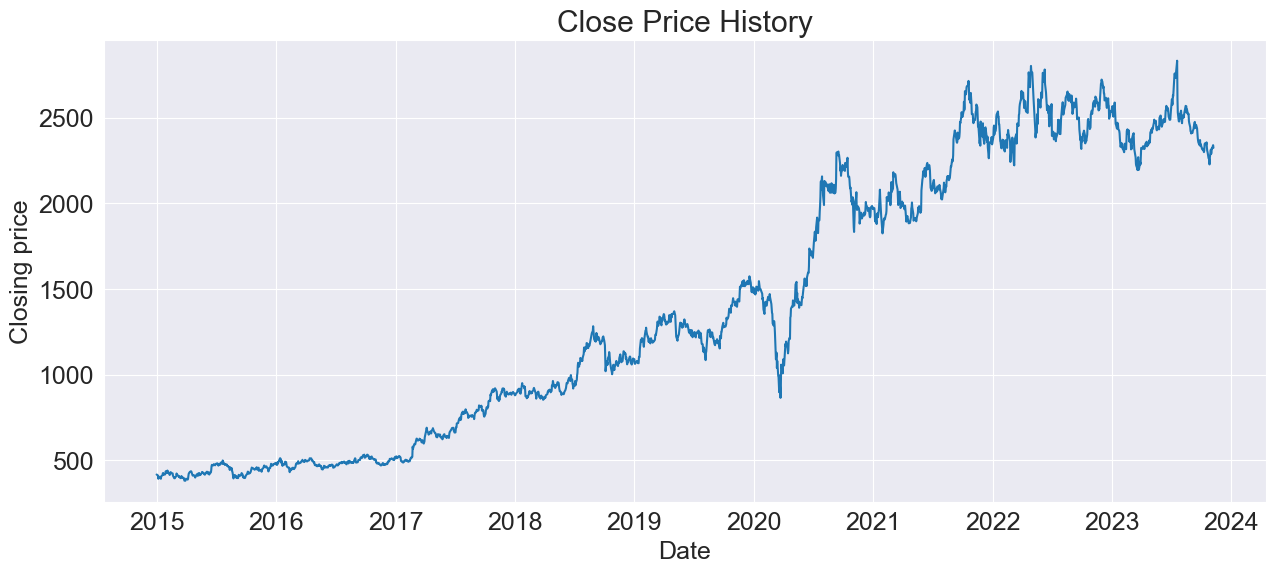

In [10]:
# ploting close price
import datetime
plt.figure(figsize=(15,6))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price",fontsize = 18)
plt.show()

In [9]:
fig = px.line(x=df.index, y=df['Close'])

# Updating layout
fig.update_layout(
    title='Close Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)

# Showing figure
fig.show()

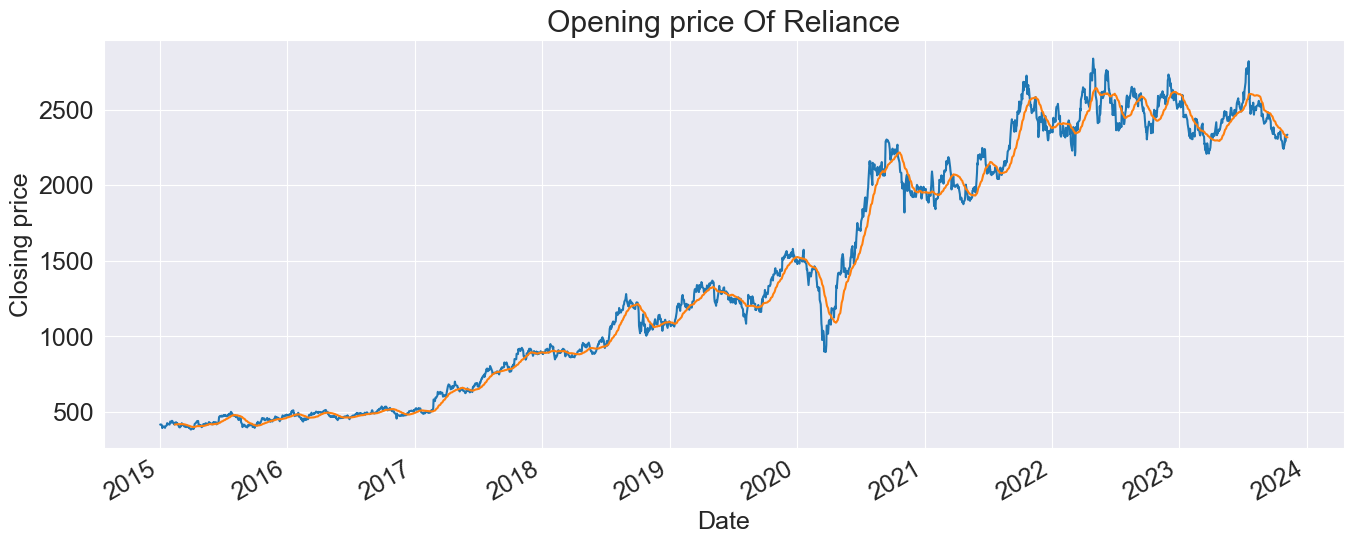

In [12]:
# 30 days moving average
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot(label="30-day Moving Average")
plt.title("Opening price Of Reliance")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price",fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Closing Price')

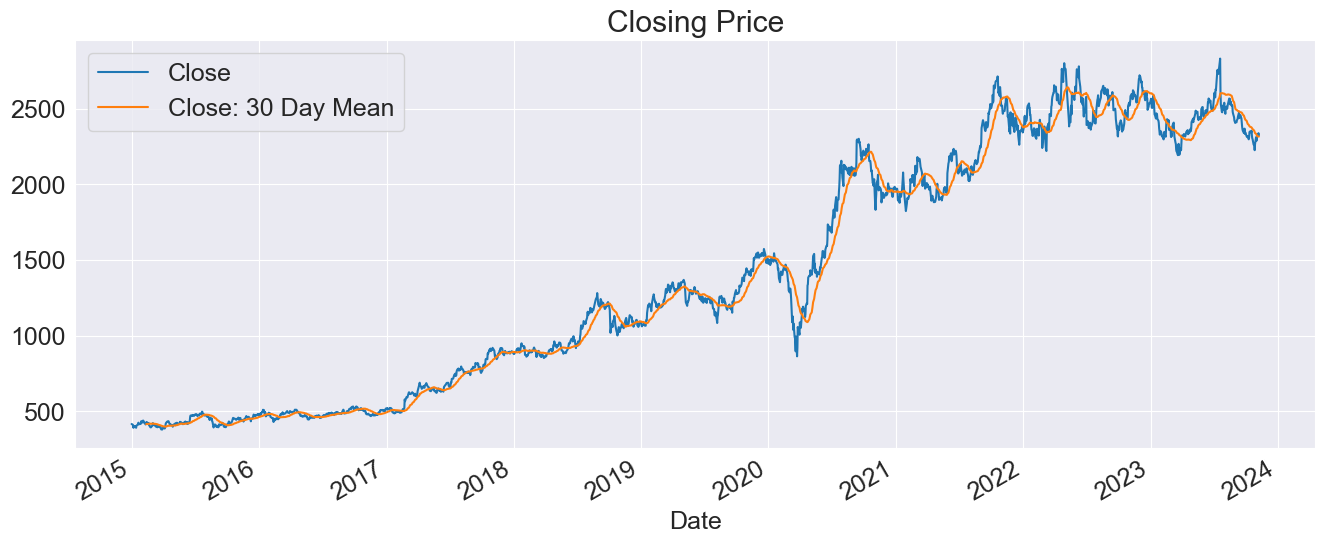

In [13]:
df['Close: 30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title("Closing Price")

<Figure size 1600x800 with 0 Axes>

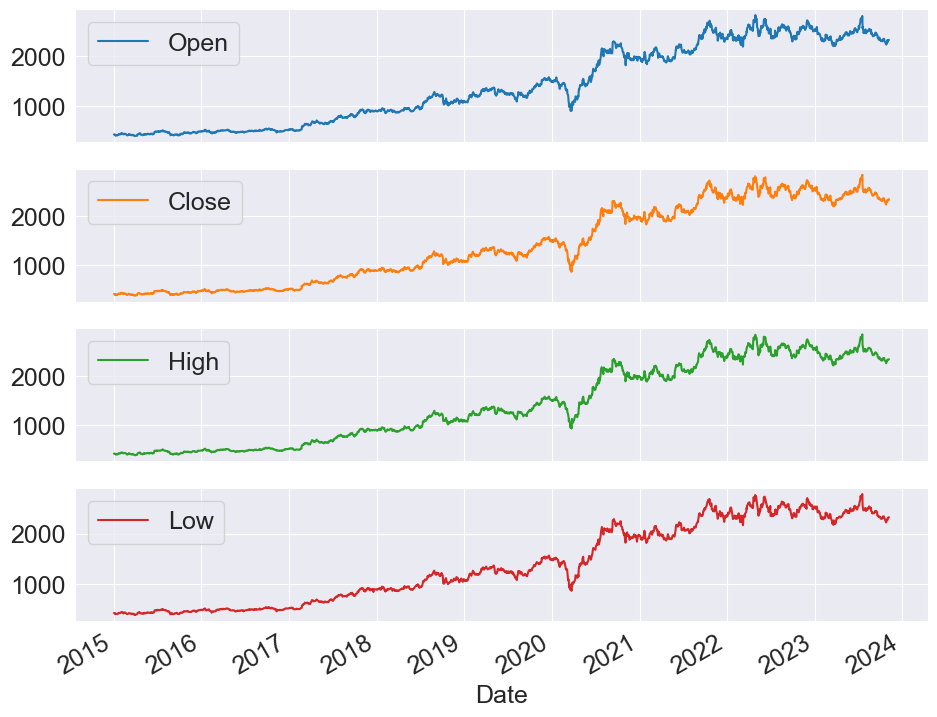

In [14]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'High', 'Low']
axes = df[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [15]:
# **candle Plot**
# Creating the figure object
import plotly.graph_objects as go
fig = go.Figure()

# Creating the Candlestick plot
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
))

# Updating layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)
fig.show()

In [16]:
df.index

DatetimeIndex(['2015-01-01 00:00:00+05:30', '2015-01-02 00:00:00+05:30',
               '2015-01-05 00:00:00+05:30', '2015-01-06 00:00:00+05:30',
               '2015-01-07 00:00:00+05:30', '2015-01-08 00:00:00+05:30',
               '2015-01-09 00:00:00+05:30', '2015-01-12 00:00:00+05:30',
               '2015-01-13 00:00:00+05:30', '2015-01-14 00:00:00+05:30',
               ...
               '2023-10-25 00:00:00+05:30', '2023-10-26 00:00:00+05:30',
               '2023-10-27 00:00:00+05:30', '2023-10-30 00:00:00+05:30',
               '2023-10-31 00:00:00+05:30', '2023-11-01 00:00:00+05:30',
               '2023-11-02 00:00:00+05:30', '2023-11-03 00:00:00+05:30',
               '2023-11-06 00:00:00+05:30', '2023-11-07 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=2186, freq=None)

In [17]:
df2 = df[["Close"]]
df2

Close
Date                                  
2015-01-01 00:00:00+05:30   416.517609
2015-01-02 00:00:00+05:30   415.415222
2015-01-05 00:00:00+05:30   410.864929
2015-01-06 00:00:00+05:30   392.218018
2015-01-07 00:00:00+05:30   400.755676
...                                ...
2023-11-01 00:00:00+05:30  2297.399902
2023-11-02 00:00:00+05:30  2320.199951
2023-11-03 00:00:00+05:30  2319.699951
2023-11-06 00:00:00+05:30  2339.000000
2023-11-07 00:00:00+05:30  2323.800049

[2186 rows x 1 columns]

In [18]:
forecast_out=7
df2['Prediction']=df2[['Close']].shift(-forecast_out)
df2.tail()

Close  Prediction
Date                                              
2023-11-01 00:00:00+05:30  2297.399902         NaN
2023-11-02 00:00:00+05:30  2320.199951         NaN
2023-11-03 00:00:00+05:30  2319.699951         NaN
2023-11-06 00:00:00+05:30  2339.000000         NaN
2023-11-07 00:00:00+05:30  2323.800049         NaN

In [19]:
X=np.array(df2.drop(['Prediction'],axis=1))
X=X[:-forecast_out]


In [20]:
Y=np.array(df2['Prediction'])
Y=Y[:-forecast_out]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_predict = lr.predict(X_test)
lr_confidence = lr.score(X_test, Y_test)
print("Linear Regression Confidence: ",lr.score(X_test,Y_test))
print("r2_scroce",r2_score(y_predict,Y_test))
print("Mean_square error = ",mean_squared_error(y_predict,Y_test))
print("square mean_square_error",math.sqrt(mean_squared_error(y_predict,Y_test)))

Linear Regression Confidence:  0.9906642625488301
r2_scroce 0.9907039479994582
Mean_square error =  5606.232081746897
square mean_square_error 74.87477600465257


# Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,Y_train)
y_predict = la.predict(X_test)
la_confidence = la.score(X_test, Y_test)
print("Lasso Regression Confidence: ",la.score(X_test,Y_test))
print("r2_scroce",r2_score(y_predict,Y_test))
print("Mean_square error = ",mean_squared_error(y_predict,Y_test))
print("square mean_square_error",math.sqrt(mean_squared_error(y_predict,Y_test)))

Lasso Regression Confidence:  0.9906642836965478
r2_scroce 0.9907039395285576
Mean_square error =  5606.219382266693
square mean_square_error 74.87469119980858


# Random Forest regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor()
rtr.fit(X_train,Y_train)
y_predict = rtr.predict(X_test)
rtr_confidence = rtr.score(X_test, Y_test)
print("Lasso Regression Confidence: ",rtr.score(X_test,Y_test))
print("r2_scroce",r2_score(y_predict,Y_test))
print("Mean_square error = ",mean_squared_error(y_predict,Y_test))
print("square mean_square_error",math.sqrt(mean_squared_error(y_predict,Y_test)))

Lasso Regression Confidence:  0.9895137961971106
r2_scroce 0.9895932092257039
Mean_square error =  6297.102128566008
square mean_square_error 79.35428235808077


# GradientBoostingRegressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
y_predict = gbr.predict(X_test)
gbr_confidence = gbr.score(X_test, Y_test)
print("Lasso Regression Confidence: ",gbr.score(X_test,Y_test))
print("r2_scroce",r2_score(y_predict,Y_test))
print("Mean_square error = ",mean_squared_error(y_predict,Y_test))
print("square mean_square_error",math.sqrt(mean_squared_error(y_predict,Y_test)))

Lasso Regression Confidence:  0.9921136409893214
r2_scroce 0.9921514392808187
Mean_square error =  4735.861427668982
square mean_square_error 68.81759533483411


# SVR

In [30]:
from sklearn.svm import SVR
svc=SVR(kernel='rbf',C=100,gamma=0.1)
svc.fit(X_train,Y_train)
svc_confidence = svc.score(X_test, Y_test)
print("SVM Confidence: ",svc.score(X_test,Y_test))
print("r2_scroce",r2_score(y_predict,Y_test))
print("Mean_square error = ",mean_squared_error(y_predict,Y_test))
print("square mean_square_error",math.sqrt(mean_squared_error(y_predict,Y_test)))

SVM Confidence:  0.804494526359674
r2_scroce 0.9921514392808187
Mean_square error =  4735.861427668982
square mean_square_error 68.81759533483411


In [31]:
#Now that we have calculated the accuracy for 4 different models, let’s visualise which models have the best accuracy.

names = ['Linear Regression', 'Random Forest', 'gradient boost regressor', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rtr_confidence, gbr_confidence, svc_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

model  accuracy
0         Linear Regression  0.990664
1             Random Forest  0.989514
2  gradient boost regressor  0.992114
3                       SVR  0.804495

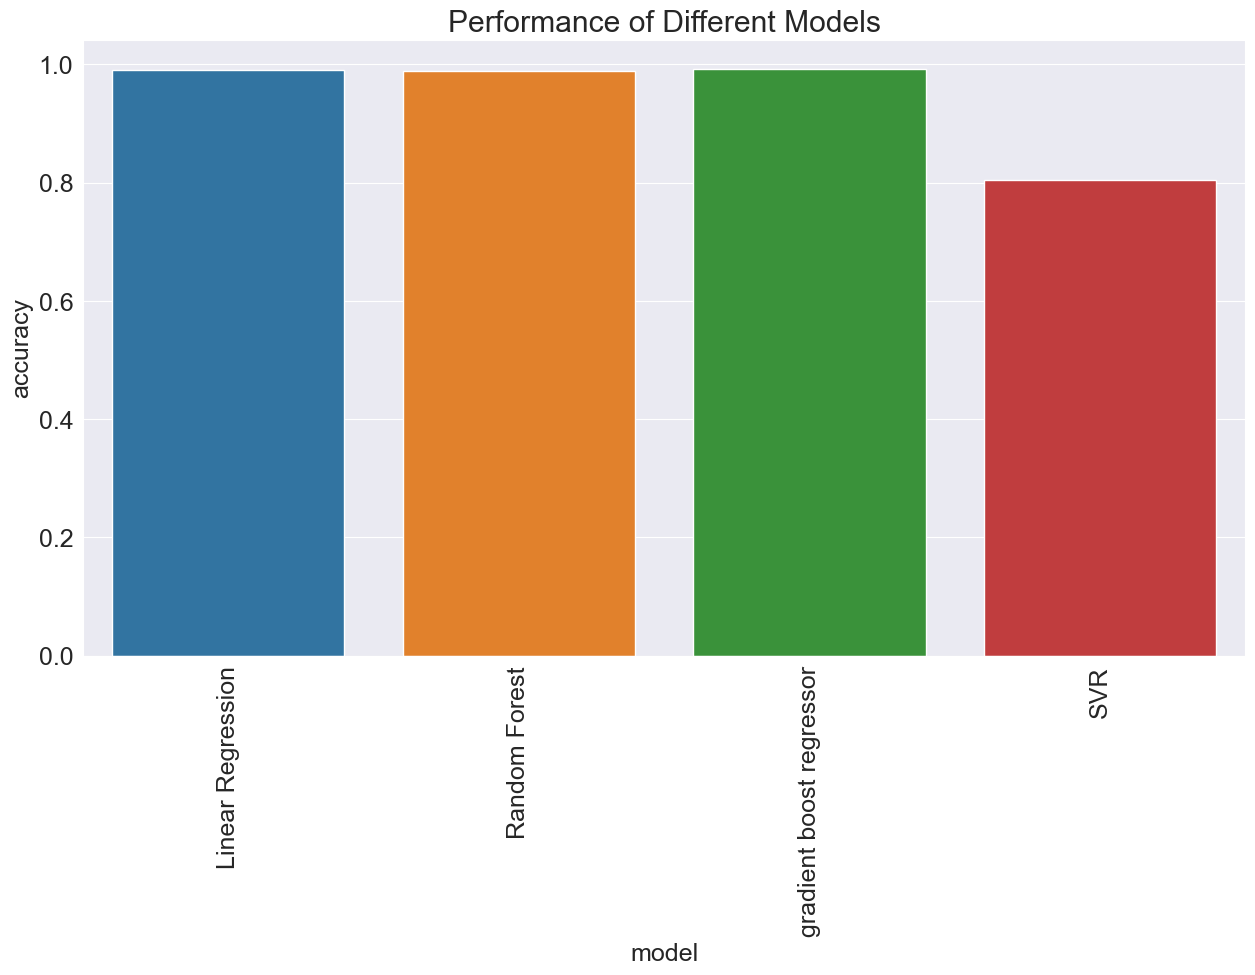

In [32]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy' )
plt.title('Performance of Different Models')
plt.xticks(rotation='vertical')
plt.show()

In [33]:
x_forecast=np.array(df2.drop(['Prediction'],axis=1))[-forecast_out:]
print(x_forecast)
x_forecast.shape

[[2312.5       ]
 [2287.89990234]
 [2297.39990234]
 [2320.19995117]
 [2319.69995117]
 [2339.        ]
 [2323.80004883]]


(7, 1)

In [34]:
lr_prediction=lr.predict(x_forecast)
print(lr_prediction)

[2317.24355457 2292.71163148 2302.18530401 2324.92216677 2324.42355243
 2343.67011479 2328.51228743]


In [35]:
df1 = df['Close']

In [36]:
# transforming the values we use minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
df1.shape

(2186, 1)

In [38]:
# train test split:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
def create_dataset(dataset,time_step =1):
    dateX,dataY = [],[]
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        dateX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dateX), np.array(dataY)


In [40]:
time_step = 250
X_train1 ,y_train1 = create_dataset(train_data,time_step)
x_test1,y_test1 = create_dataset(test_data,time_step)

In [41]:
print(X_train1)

[[0.01476285 0.01431318 0.01245707 ... 0.0375267  0.03943345 0.04466963]
 [0.01431318 0.01245707 0.0048508  ... 0.03943345 0.04466963 0.0410014 ]
 [0.01245707 0.0048508  0.0083334  ... 0.04466963 0.0410014  0.04342109]
 ...
 [0.36673305 0.37598203 0.36507855 ... 0.73424806 0.74012561 0.75175951]
 [0.37598203 0.36507855 0.3675303  ... 0.74012561 0.75175951 0.74743732]
 [0.36507855 0.3675303  0.36635422 ... 0.75175951 0.74743732 0.74376125]]


In [42]:
print("The shape of X_train1 shape",X_train1.shape)
print("The shape of y_train1 shape",y_train1.shape)
print("The shape of X_test1 shape",x_test1.shape)
print("The shape of y_test1 shape",y_test1.shape)

The shape of X_train1 shape (1169, 250)
The shape of y_train1 shape (1169,)
The shape of X_test1 shape (515, 250)
The shape of y_test1 shape (515,)


In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train1.reshape(X_train1.shape[0],X_train1.shape[1] , 1)
X_test = x_test1.reshape(x_test1.shape[0],x_test1.shape[1] , 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(250,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 250, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.fit(X_train1,y_train1,validation_data=(X_test,y_test1),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
19/19 [==============================] - 7s 387ms/step - loss: 5.6766e-04 - val_loss: 0.0016
Epoch 2/20
19/19 [==============================] - 7s 389ms/step - loss: 5.7785e-04 - val_loss: 0.0021
Epoch 3/20
19/19 [==============================] - 7s 382ms/step - loss: 5.6945e-04 - val_loss: 0.0046
Epoch 4/20
19/19 [==============================] - 7s 391ms/step - loss: 6.2930e-04 - val_loss: 0.0014
Epoch 5/20
19/19 [==============================] - 8s 411ms/step - loss: 5.2083e-04 - val_loss: 0.0013
Epoch 6/20
19/19 [==============================] - 10s 541ms/step - loss: 5.0096e-04 - val_loss: 0.0022
Epoch 7/20
19/19 [==============================] - 10s 542ms/step - loss: 6.3604e-04 - val_loss: 0.0022
Epoch 8/20
19/19 [==============================] - 10s 554ms/step - loss: 5.1720e-04 - val_loss: 0.0015
Epoch 9/20
19/19 [==============================] - 9s 493ms/step - loss: 5.0566e-04 - val_loss: 0.0030
Epoch 10/20
19/19 [==============================] - 10s 545m

In [68]:
# prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 71ms/step


In [69]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [70]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
# for train data
math.sqrt(mean_squared_error(y_train1,train_predict))

1092.5933292840282

In [71]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test1,test_predict))

2512.7682164781318

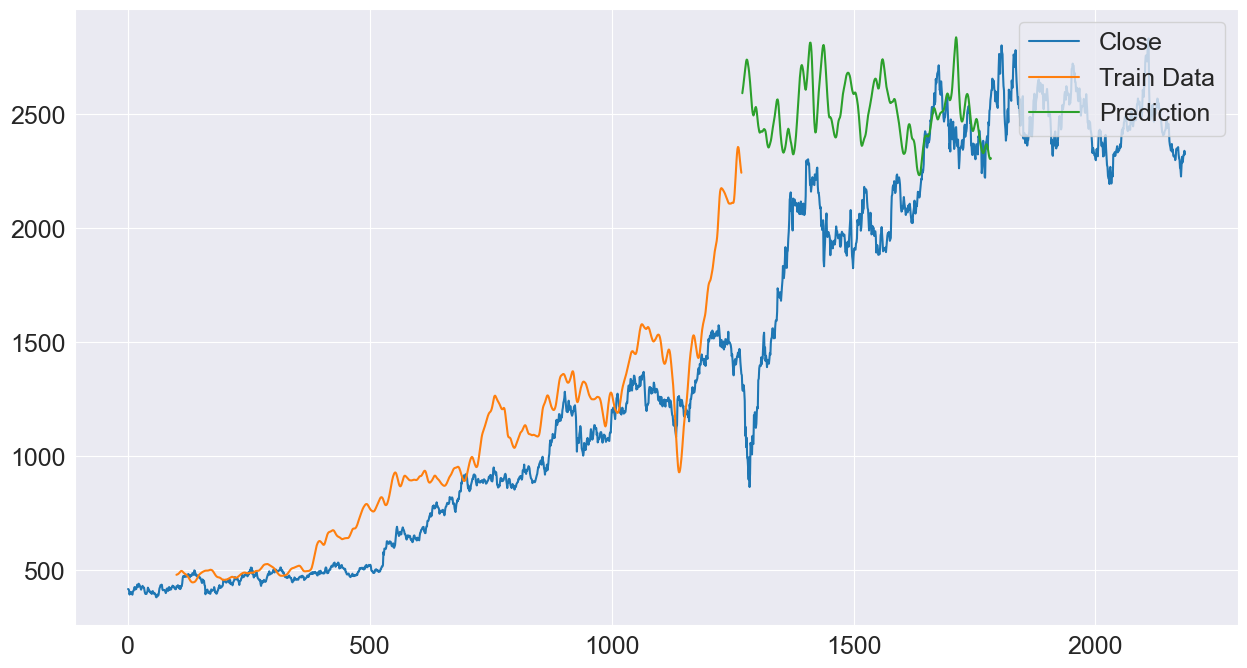

In [72]:
# Assuming df1 is your original time series data

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:look_back+len(train_predict), :] = train_predict.reshape(-1, 1)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back+len(train_predict)+1:look_back+len(train_predict)+1+len(test_predict), :] = test_predict.reshape(-1, 1)

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Close', 'Train Data', 'Prediction'], loc='upper right')
plt.show()


In [73]:
 len(test_data)

766

In [74]:
# taking previeus data of 100 days  
x_input=test_data[563:].reshape(1,-1)
x_input.shape

(1, 203)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [76]:
lst_output=[]
n_steps=100
i=0
while(i<8):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.84950298 0.84787702 0.83832489 0.85242955 0.85076296 0.84968582
 0.83773543 0.83271553 0.82688259 0.81330633 0.79493375 0.80403873
 0.80164056 0.79597015 0.79070636 0.79153971 0.78440606 0.78215011
 0.80086826 0.80253486 0.79464913 0.78924312 0.81149763 0.83338615
 0.83261395 0.83673956 0.8262525  0.83426013 0.81182268 0.80718888
 0.8137738  0.80733119 0.78891797 0.79759612 0.79034058 0.81446474
 0.8239356  0.82745173 0.80383547 0.78897882 0.77345154 0.76997614
 0.75416435 0.74963212 0.74849404 0.73961253 0.76743577 0.77024045
 0.75853395 0.74044588 0.75436761 0.75861521 0.75320911 0.79237296
 0.79253548 0.79025931 0.79660024 0.7898528  0.79452733 0.79871389
 0.80231119 0.80716856 0.7961532  0.80088858 0.7984701  0.79966913
 0.80332738 0.81066428 0.80499397 0.8110708  0.82873203 0.83708512
 0.8285695  0.83991012 0.83736965 0.84962477 0.85273439 0.85966478
 0.85303923 0.85468551 0.85667716 0.84226765 0.83637377 0.83423981
 0.83745091 0.84275543 0.84257249 0.83675997 0.836

ValueError: cannot reshape array of size 202 into shape (1,100,1)

In [77]:
day_new=np.arange(1,101)
day_pred=np.arange(101,109)

In [78]:
len(df1)

2186

ValueError: x and y must have same first dimension, but have shapes (100,) and (6, 1)

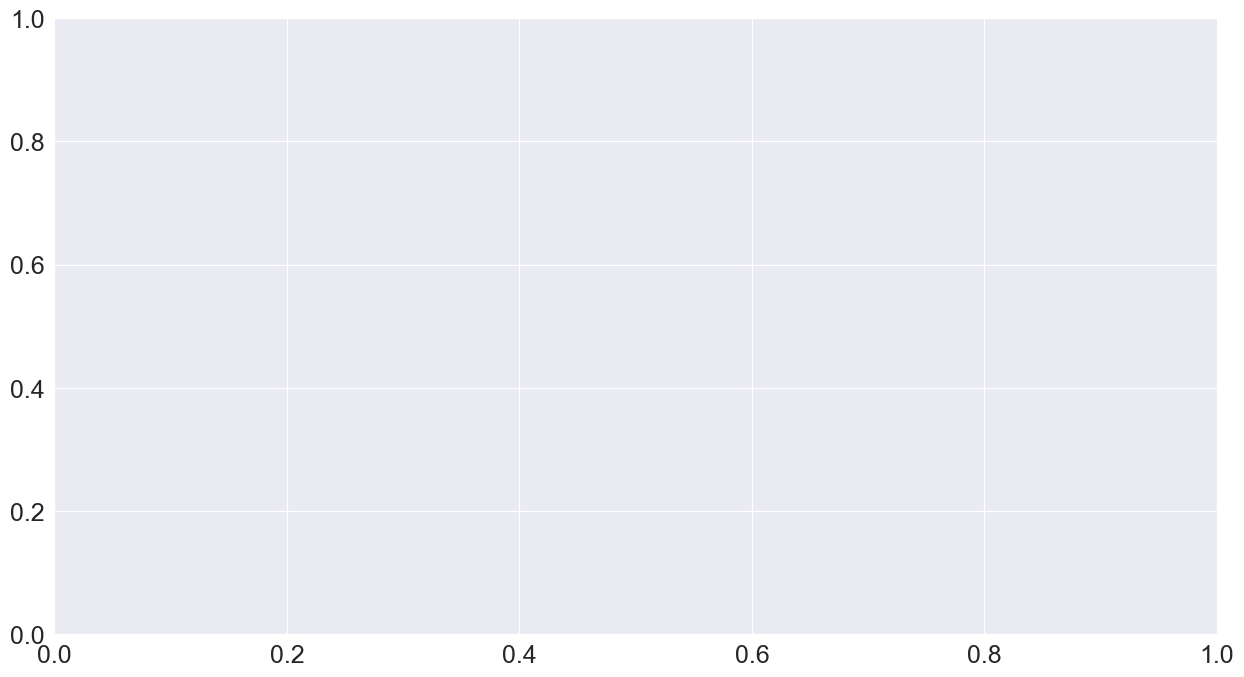

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[2180:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

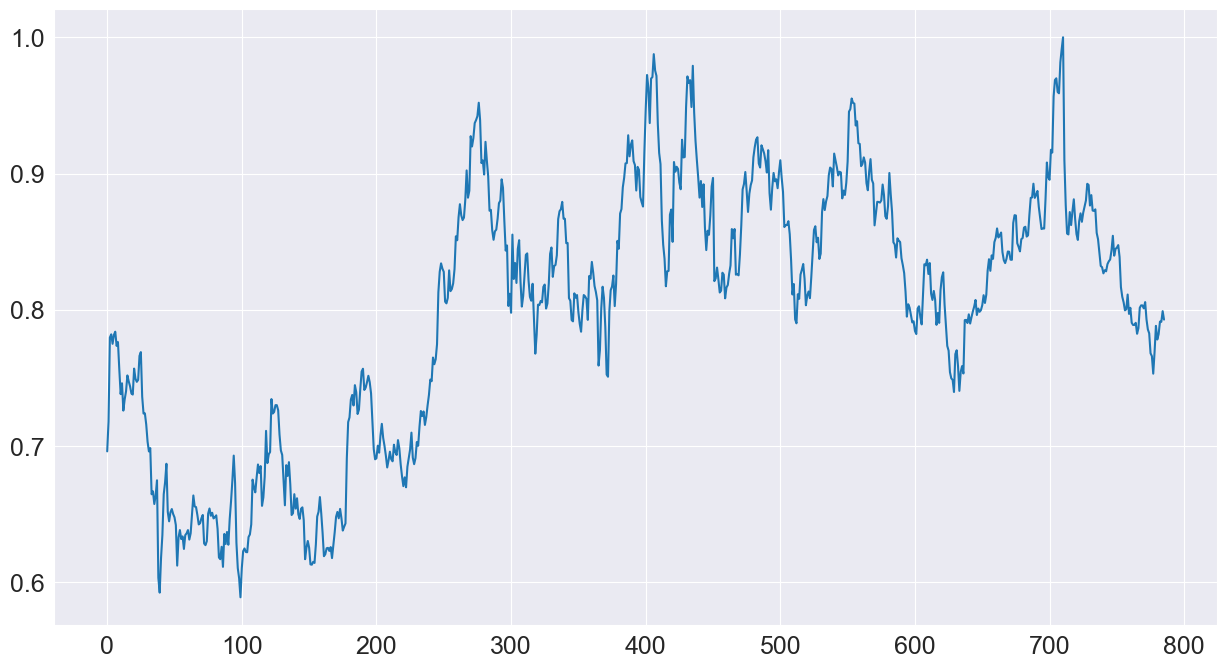

In [82]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1400:])

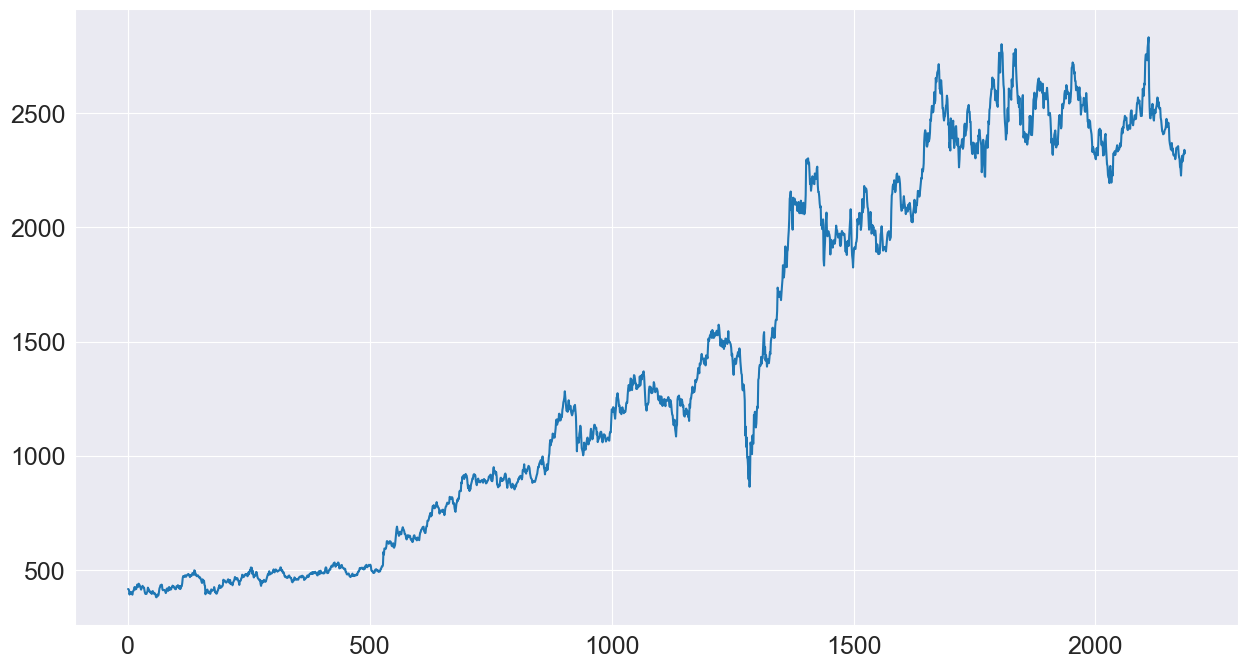

In [83]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)